## Étude des bans

Notebook sur l'étude du dataset des personnages bannies durant les matchs,

Avant, 2016 seuls 3 champions par équipe pouvait être bannies, ce chiffre est monter à 5 par la suite



In [1]:

#Import librairie
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

%matplotlib inline


In [2]:

path_setRaw = "../../Data/DataRaw/set_bans.csv"
path_setRework = "../../Data/DataRework/set_bansRework.csv"

df_bans_raw = pd.read_csv(path_setRaw)
df_bans_rework = pd.read_csv(path_setRework)


df_bans_rework.Date = pd.to_datetime(df_bans_rework.Date)

In [3]:

df_bans_raw.head()


,Address,Team,ban_1,ban_2,ban_3,ban_4,ban_5
0,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Rumble,Kassadin,Lissandra,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Kassadin,Sivir,Lissandra,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,JarvanIV,Lissandra,Kassadin,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Annie,Lissandra,Kassadin,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Irelia,Pantheon,Kassadin,NaN,NaN


In [4]:

df_bans_rework.head()


,Champions,ban_pos,TeamBan,Date
0,Rumble,ban_1,blueBans,2015-01-24
1,Kassadin,ban_1,blueBans,2015-01-24
2,JarvanIV,ban_1,blueBans,2015-01-25
3,Annie,ban_1,blueBans,2015-01-25
4,Irelia,ban_1,blueBans,2015-01-25


In [5]:

liste_champions = df_bans_rework.Champions.unique()

len(liste_champions)



138

In [6]:
df_bans_rework.groupby(by=df_bans_rework.Date.dt.year).size()

Date
2014     1800
2015    14170
2016    25240
2017    33280
2018     1710
dtype: int64

In [7]:
df_bans_rework.Champions.value_counts()

Leblanc         2477
Kalista         1959
Ryze            1896
Elise           1577
Shen            1571
                ... 
Garen              2
FiddleSticks       2
Fiddlesticks       2
Amumu              1
Volibear           1
Name: Champions, Length: 137, dtype: int64

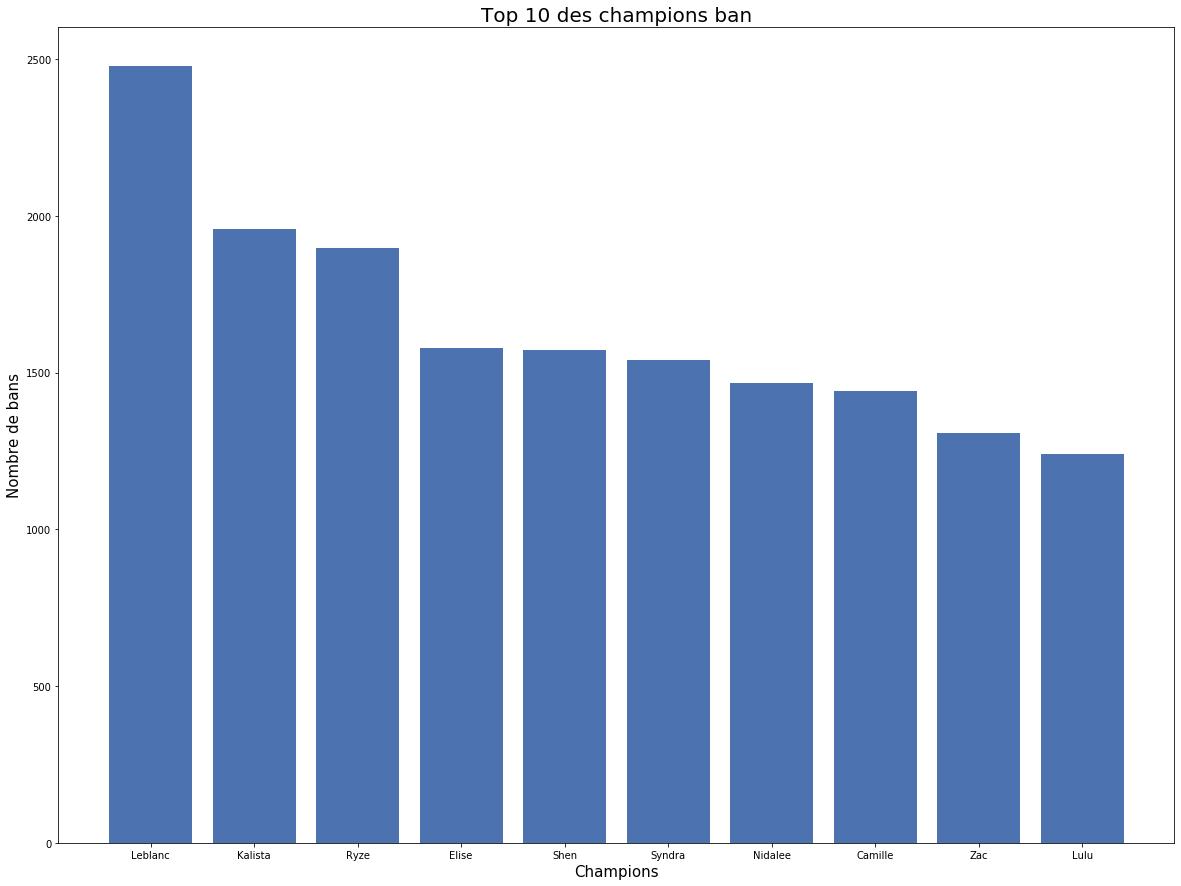

In [13]:
plt.figure(figsize=(20,15))
plt.title("Top 10 des champions bannis", fontsize=20)
plt.xlabel("Champions", fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("Nombre de bans", fontsize=15)

test = pd.DataFrame(df_bans_rework.Champions.value_counts())

tt = test.sort_values(by="Champions", ascending=False).head(10)

plt.bar(tt.index,tt.Champions)


plt.show()

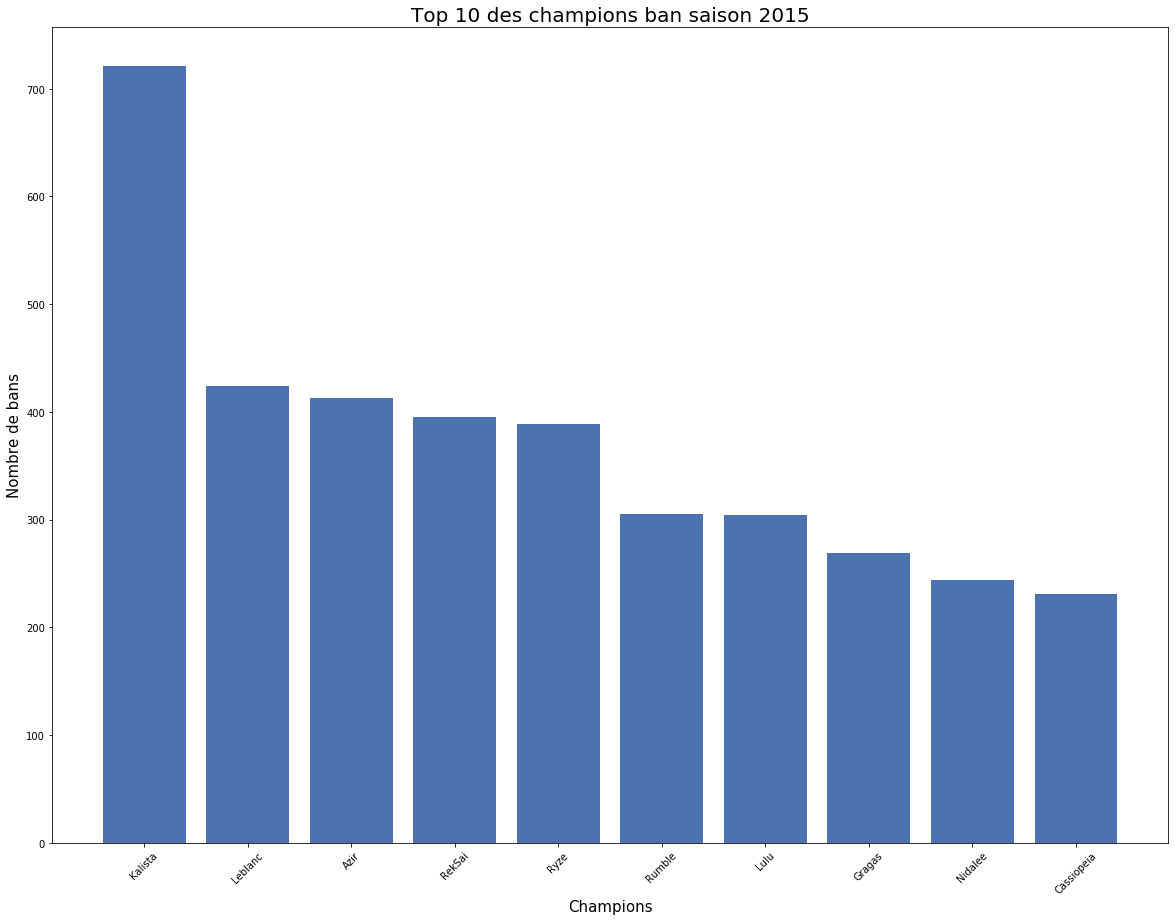

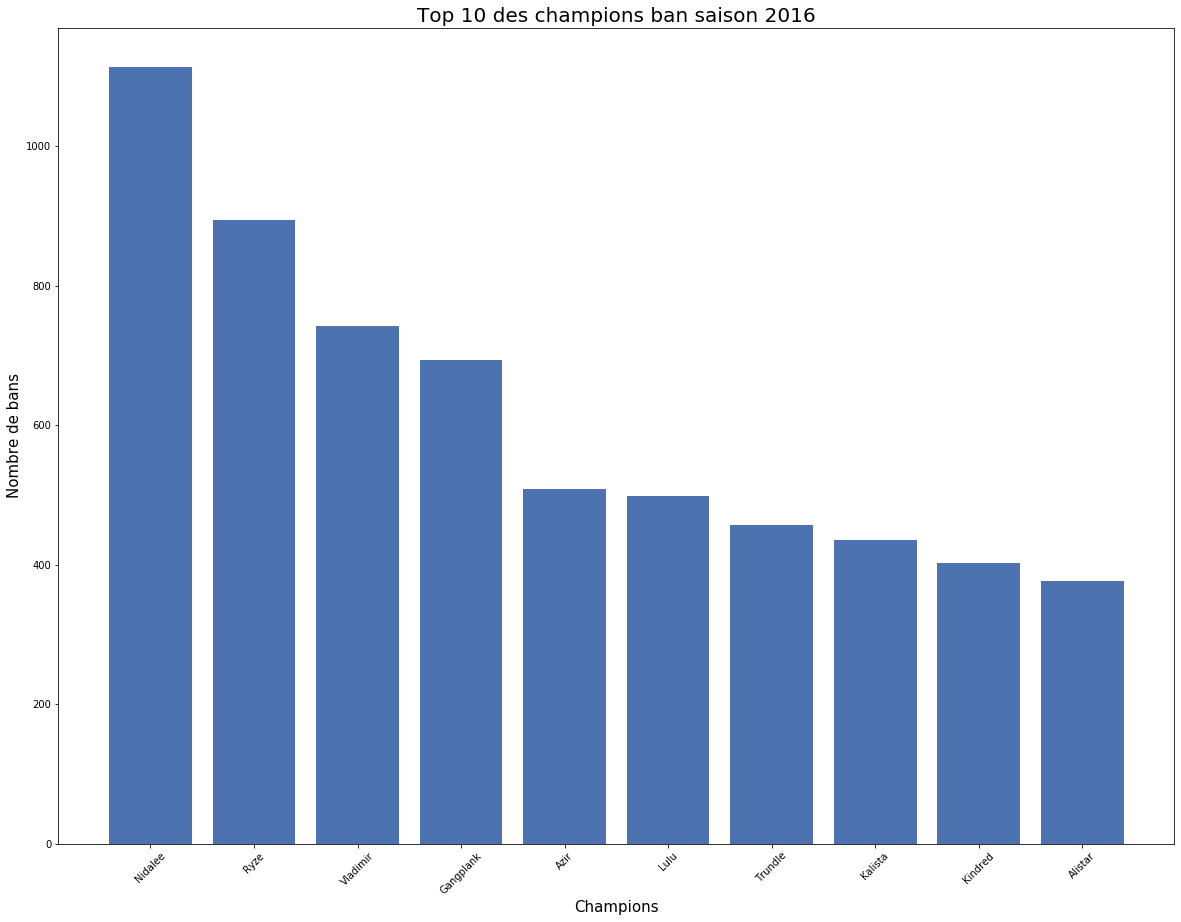

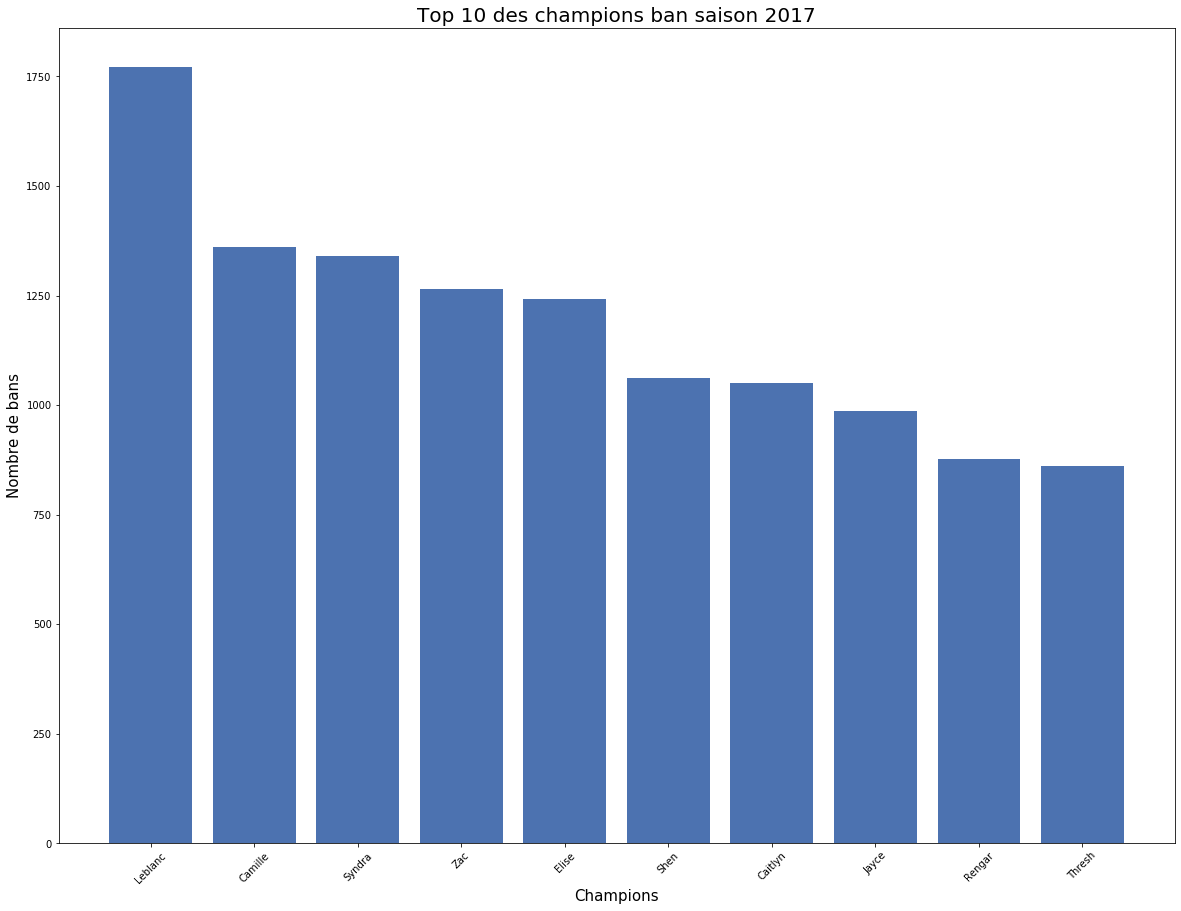

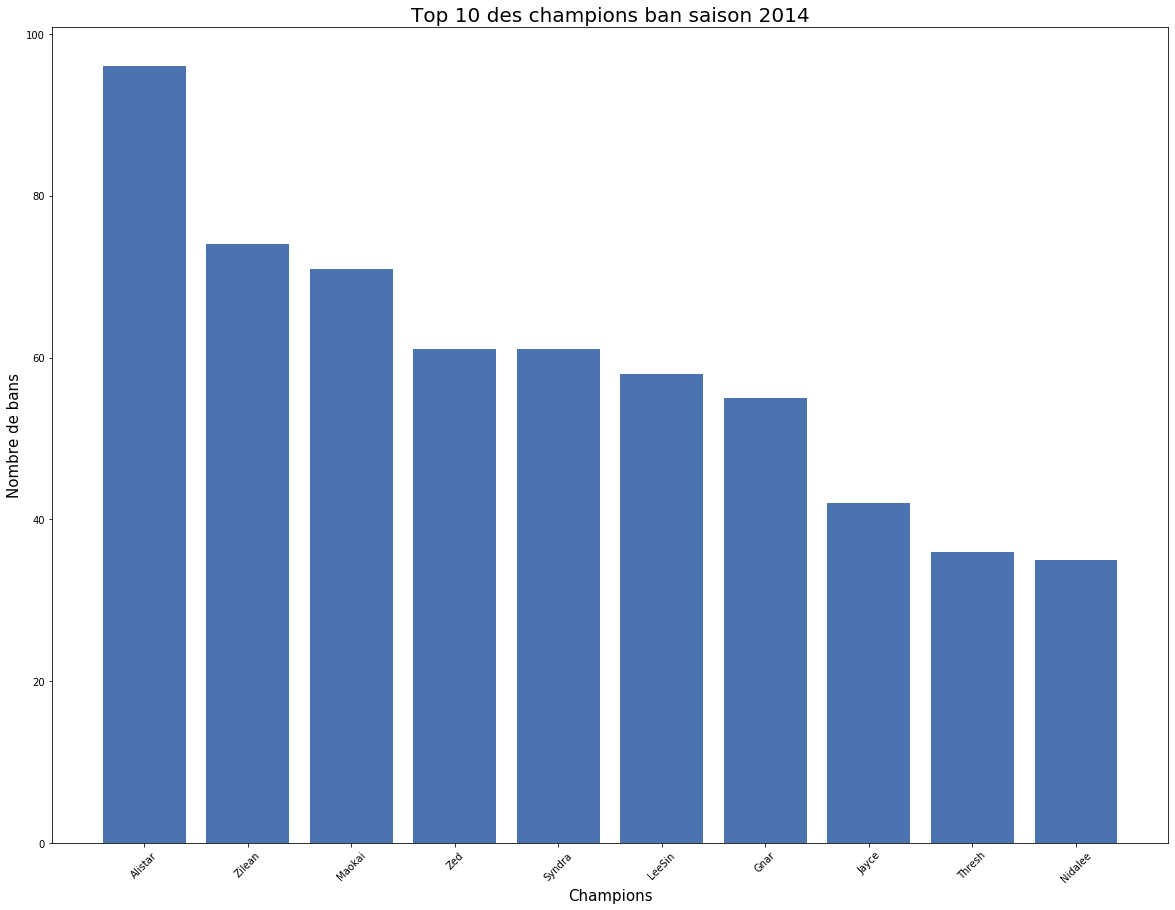

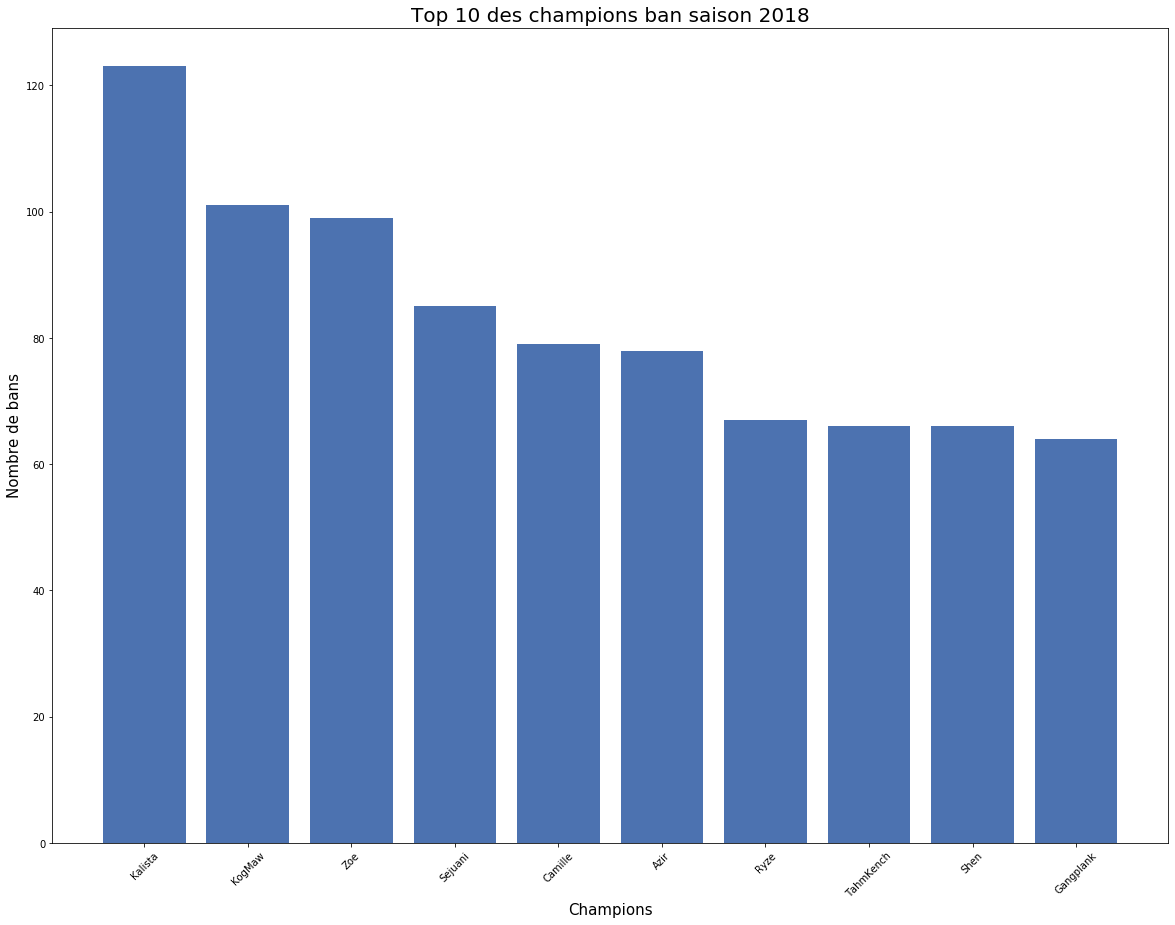

In [9]:
for i in df_bans_rework.Date.dt.year.unique():
    plt.figure(figsize=(20,15))
    plt.title("Top 10 des champions bans saison {}".format(i), fontsize=20)
    plt.xlabel("Champions", fontsize=15)
    plt.xticks(rotation=45)
    plt.ylabel("Nombre de bans", fontsize=15)

    test = pd.DataFrame(df_bans_rework[df_bans_rework.Date.dt.year == i].Champions.value_counts())

    tt = test.sort_values(by="Champions", ascending=False).head(10)

    plt.bar(tt.index,tt.Champions)


    plt.show()